## Laptop Price Prediction
#### Life cycle of this project
* Understanding the Problem Statement
* Data Collection
* Data Checks to Perform
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* choose best model

### 1. Problem Statement
* This project understands how the laptop price is affected by the other variables such as Company, Product, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, GPU, OpSys, Weight.

### 2. Data Collection
* Dataset Source - https://www.kaggle.com/datasets/muhammetvarl/laptop-price/data
* The data consiss of 13 Columns and 1303 rows
### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library.

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import re

Import the CSV Data as Pandas Dataframe

In [64]:
df = pd.read_csv('data/laptop_price.csv')

Show top 5 records

In [65]:
df = df.drop(columns=['laptop_ID'],axis=1)

In [66]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [67]:
df.shape

(1303, 12)

### 2.2 Dataset Information
* Company: String - Laptop Manufecturer
* Product: String - Brand and Model
* TypeName: String - Type(Notebook, Ultrabook, Gaming, etc.)
* Inches: Numeric - Screen Size
* ScreenResolution: String - Screen Resolution
* Cpu: String - Central Processing Unit (CPU)
* Ram: String - Laptop RAM
* Memory: String - Hard Disk / SSD Memory
* GPU: String - Graphics Processing Units
* OpSys: String - Operating Syste
* Weight: String - Laptop Weight
* Price_euros: Numeric - Price (Euro)

### 3. Data Checks to Perform
* Check missing values
* Check duplicates
* Check data type
* Chck the number of unique values of each column
* Check statistics of dataset
* Check various categories present in the different categorical column

### 3.1 Check missing values

In [68]:
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

There is no missing vallues in the data set

### 3.2 Check Duplicates

In [69]:
df.duplicated().sum()

28

There are 28 duplicated values

In [70]:
df = df.drop_duplicates()

In [71]:
df.duplicated().sum()

0

Duplicates were removed

### 3.3. Check data types

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
dtypes: float64(2), object(10)
memory usage: 129.5+ KB


### 3.4 Checking the number of unique values of each column

In [73]:
df.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 110
OpSys                 9
Weight              179
Price_euros         791
dtype: int64

### 3.5 Check statistics of data set

In [74]:
df.describe()

,Inches,Price_euros
count,1275.000000,1275.000000
mean,15.022902,1134.969059
std,1.429470,700.752504
min,10.100000,174.000000
25%,14.000000,609.000000
50%,15.600000,989.000000
75%,15.600000,1496.500000
max,18.400000,6099.000000


### 3.6 Check various categories present in the different categorical column

In [75]:
print("Categories in 'TypeName' variable:       ",end=" ")
print(df['TypeName'].unique())

print("Categories in 'Ram' variable:       ",end=" ")
print(df['Ram'].unique())

print("Categories in 'OpSys' variable:       ",end=" ")
print(df['OpSys'].unique())

Categories in 'TypeName' variable:        ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Categories in 'Ram' variable:        ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']
Categories in 'OpSys' variable:        ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [76]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Inches', 'Price_euros']

We have 10 categorical features : ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']


### 4. EDA (Visualization)
### 4.1 Visualize price distribution to make some conclusion
* Histogram
* Kernel Distribution Function (KDE)
### 4.1.1 Histogram & KDE

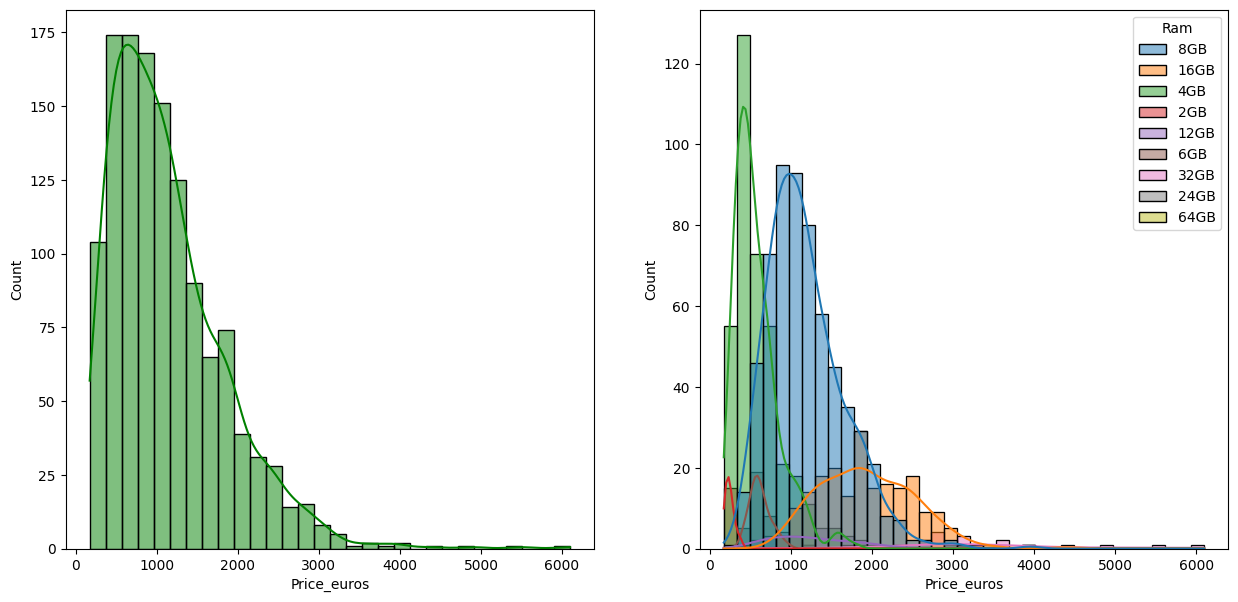

In [77]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Price_euros',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Price_euros',kde=True,hue='Ram')
plt.show()

#### Insight
* We can easily tell that the higher the RAM the more expensive the price.

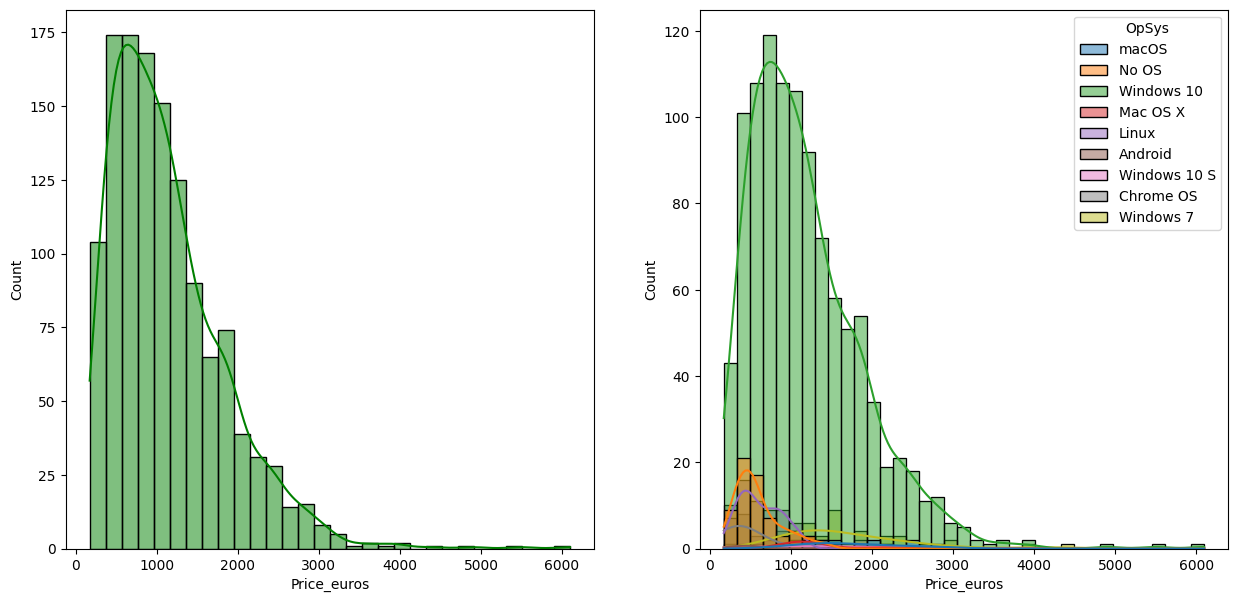

In [78]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Price_euros',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Price_euros',kde=True,hue='OpSys')
plt.show()

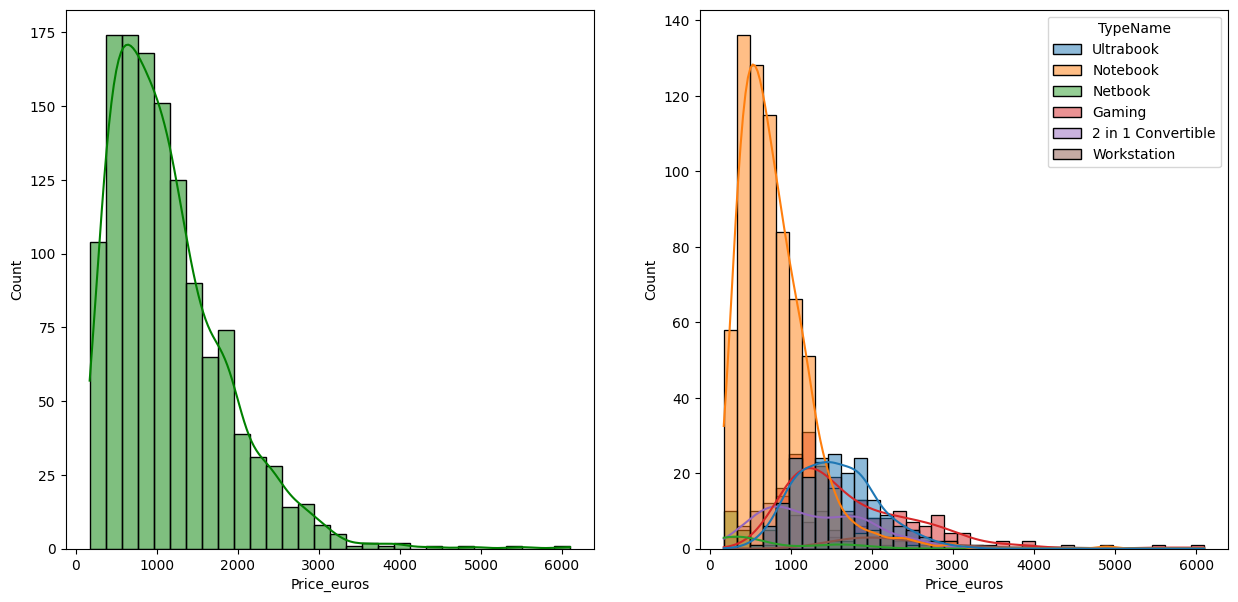

In [79]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Price_euros',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Price_euros',kde=True,hue='TypeName')
plt.show()

#### Insight
* Gaming Laptop tend to be more expensive than the other laptop but the amount of notebook is more than the rest.

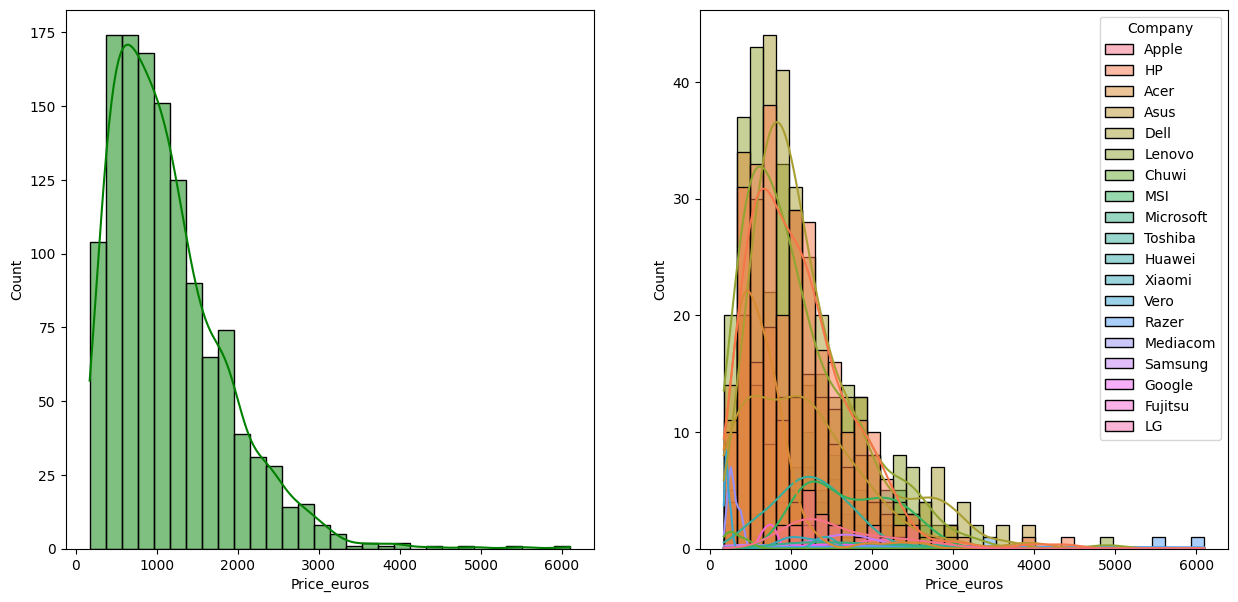

In [80]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Price_euros',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Price_euros',kde=True,hue='Company')
plt.show()

### 4.2 Maximum price of laptops in all TypeName

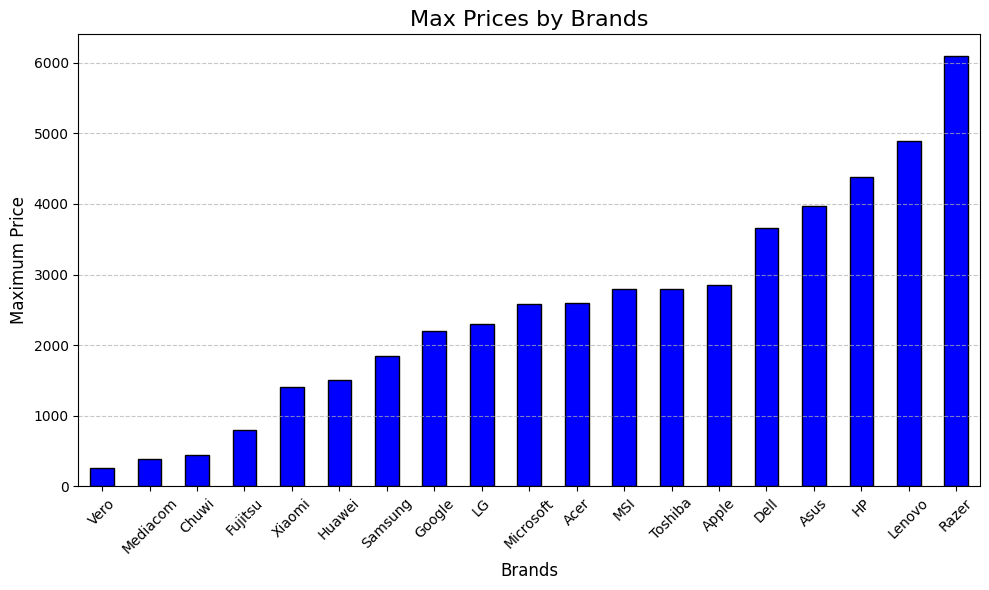

In [81]:
# Calculating the max prices by brand
max_prices = df.groupby('Company')['Price_euros'].max().sort_values()

plt.figure(figsize=(10, 6))
max_prices.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Max Prices by Brands', fontsize=16)
plt.xlabel('Brands', fontsize=12)
plt.ylabel('Maximum Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 4.3 The relationship between Price and Inches

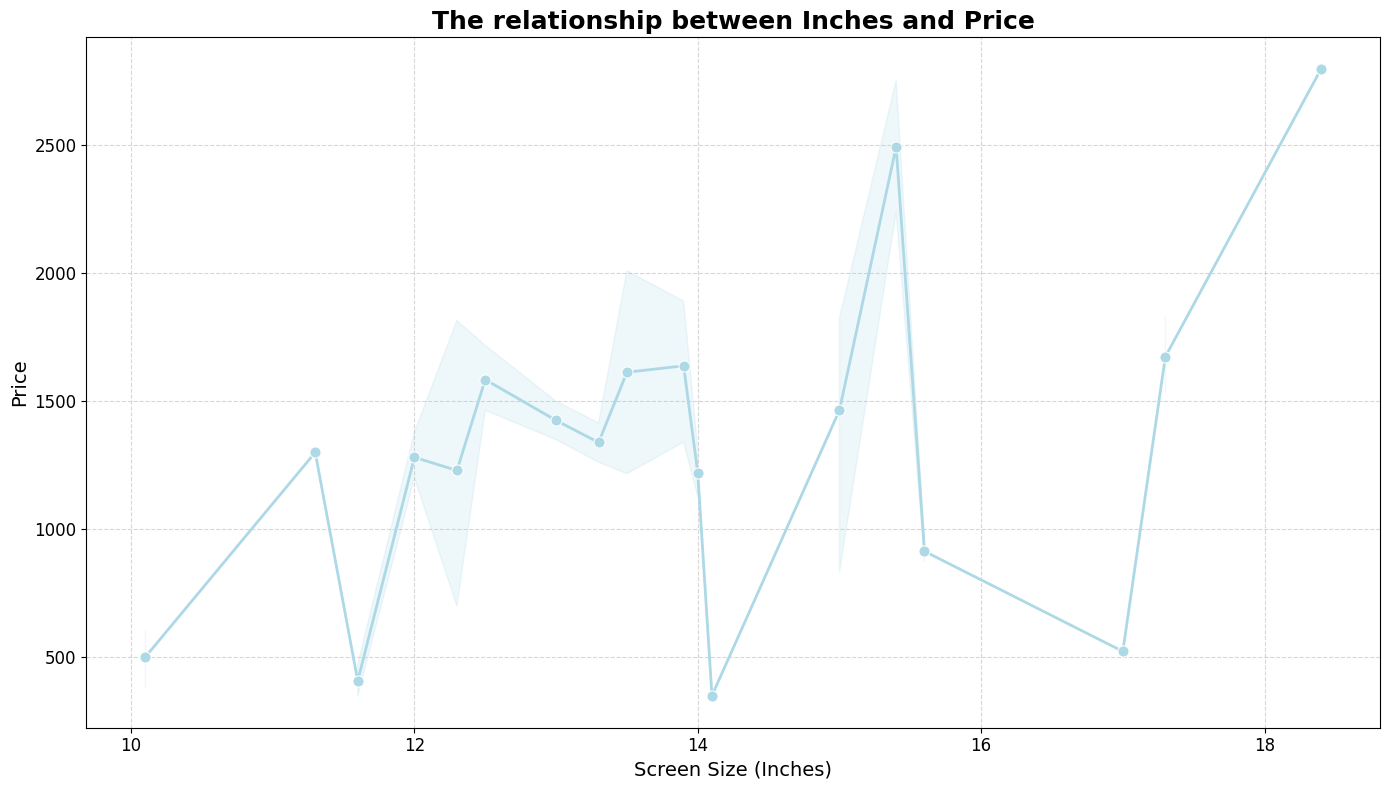

In [82]:
# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Inches', y='Price_euros', marker='o', color='lightblue', linewidth=2, markersize=8)

# Titles and labels
plt.title('The relationship between Inches and Price', fontsize=18, fontweight='bold')
plt.xlabel('Screen Size (Inches)', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Font style and axis settings
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Background aesthetic
plt.grid(True, linestyle='--', alpha=0.5)

# Optimize layout
plt.tight_layout()
plt.show()

### 4.3 Average Price of each Ram

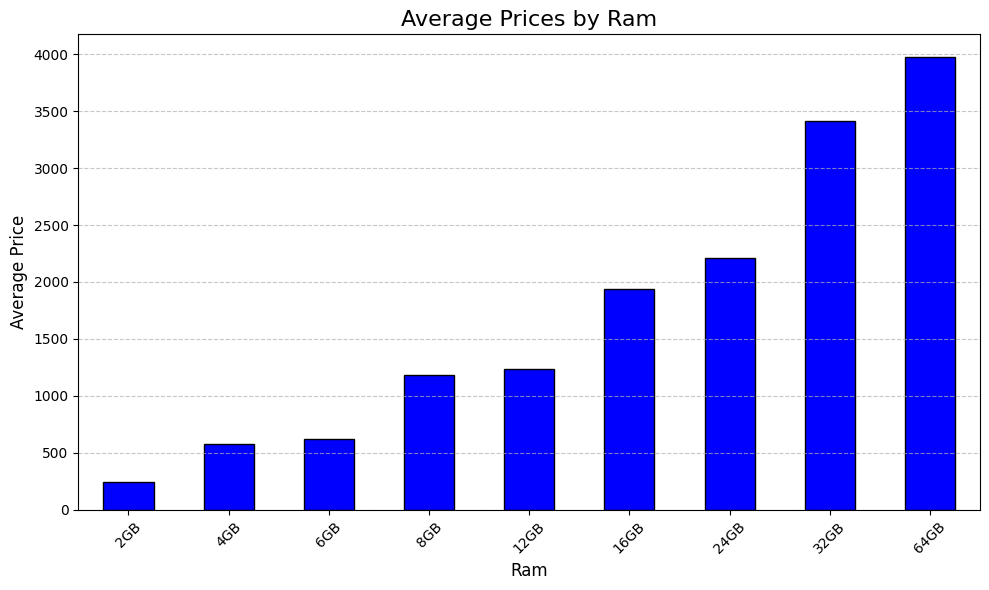

In [83]:
average_prices = df.groupby('Ram')['Price_euros'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Average Prices by Ram', fontsize=16)
plt.xlabel('Ram', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 4.4 Average prices for each Cpu Manufacturer.

In [84]:
# Function to extract the CPU manufacturer (first word of the string)
def extract_cpu_manufacturer(cpu):
    return cpu.split()[0]

# Function to extract the CPU series (first two words of the string)
def extract_cpu_series(cpu):
    return " ".join(cpu.split()[:2])

# Function to extract the CPU model
def extract_cpu_model(cpu):
    match = re.search(r'\d+[A-Za-z]*', cpu)
    return match.group() if match else None

# Function to extract the CPU clock speed (e.g., 2.3GHz as 2.3)
def extract_clock_speed(cpu):
    match = re.search(r'[\d\.]+GHz', cpu)
    return float(match.group()[:-3]) if match else None  # Remove the last 3 letters (GHz) and Converts to float

In [85]:
# Split Cpu into 4 different columns
df['CPU Manufacturer'] = df['Cpu'].apply(extract_cpu_manufacturer)
df['CPU Series'] = df['Cpu'].apply(extract_cpu_series)
df['CPU Model'] = df['Cpu'].apply(extract_cpu_model)
df['CPU Clock Speed'] = df['Cpu'].apply(extract_clock_speed)

In [86]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,CPU Manufacturer,CPU Series,CPU Model,CPU Clock Speed
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,Intel Core,5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,Intel Core,5,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,Intel Core,5,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,Intel Core,7,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,Intel Core,5,3.1


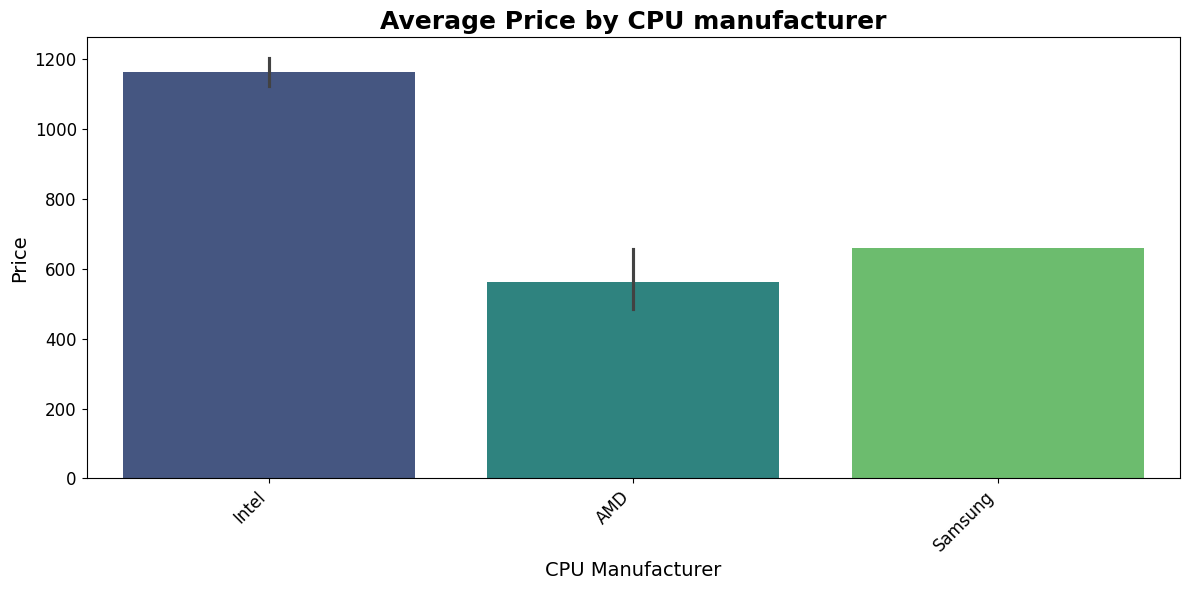

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['CPU Manufacturer'], y=df['Price_euros'], palette='viridis')

plt.title('Average Price by CPU manufacturer', fontsize=18, fontweight='bold')
plt.xlabel('CPU Manufacturer', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


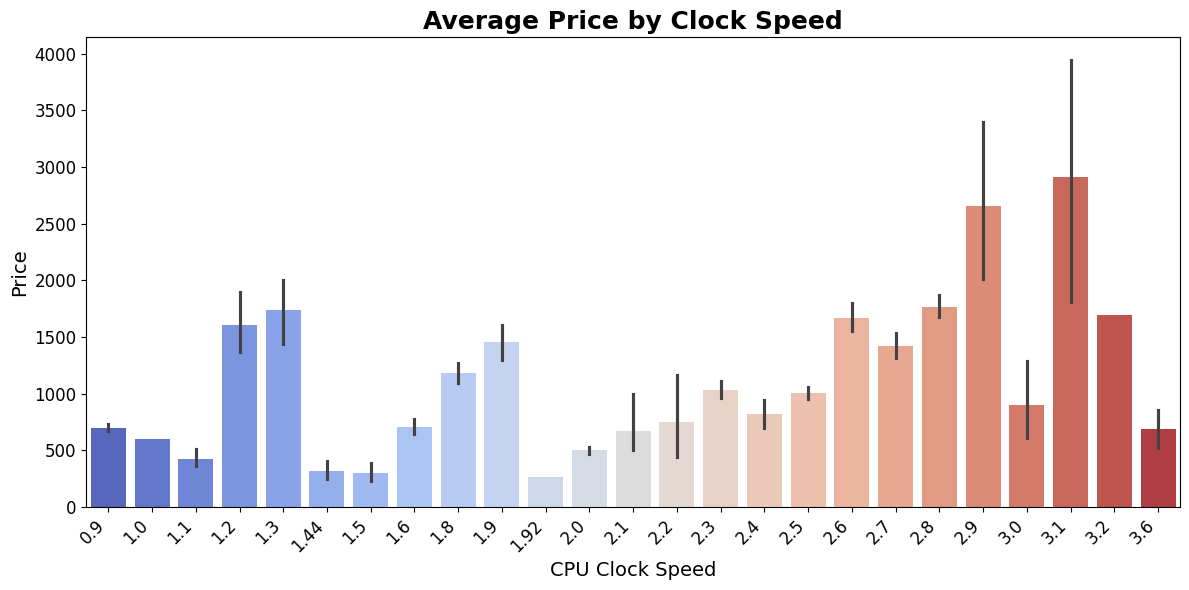

In [88]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['CPU Clock Speed'], y=df['Price_euros'], palette='coolwarm')

plt.title('Average Price by Clock Speed', fontsize=18, fontweight='bold')
plt.xlabel('CPU Clock Speed', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### 4.5 Average Price by GPU

In [89]:
def extract_gpu_model(gpu):
    return gpu.split()[0]

df['GPU Model'] = df['Gpu'].apply(extract_gpu_model)

In [90]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,CPU Manufacturer,CPU Series,CPU Model,CPU Clock Speed,GPU Model
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,Intel Core,5,2.3,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,Intel Core,5,1.8,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,Intel Core,5,2.5,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,Intel Core,7,2.7,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,Intel Core,5,3.1,Intel


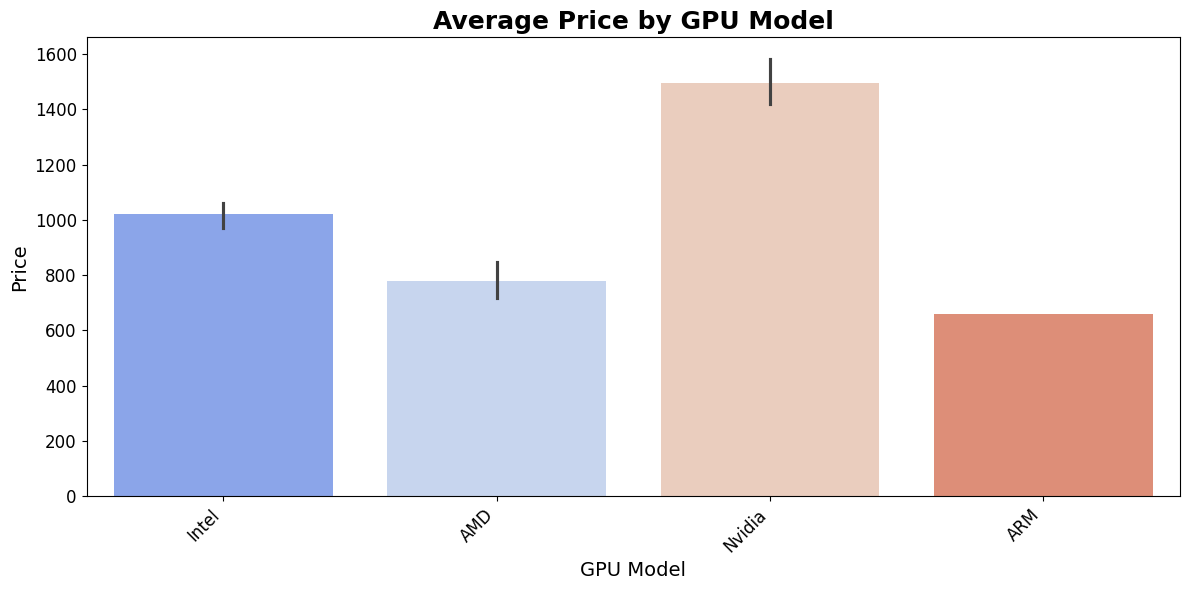

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['GPU Model'], y=df['Price_euros'], palette='coolwarm')

plt.title('Average Price by GPU Model', fontsize=18, fontweight='bold')
plt.xlabel('GPU Model', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [92]:
# Extract the screen resolution
def extract_screen_resolution(screen_res):
    match = re.search(r'\b\d+x\d+\b', screen_res)
    return match.group() if match else None

In [93]:
df['ResolutionValue'] = df['ScreenResolution'].apply(extract_screen_resolution)

In [94]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,CPU Manufacturer,CPU Series,CPU Model,CPU Clock Speed,GPU Model,ResolutionValue
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,Intel Core,5,2.3,Intel,2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,Intel Core,5,1.8,Intel,1440x900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,Intel Core,5,2.5,Intel,1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,Intel Core,7,2.7,AMD,2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,Intel Core,5,3.1,Intel,2560x1600


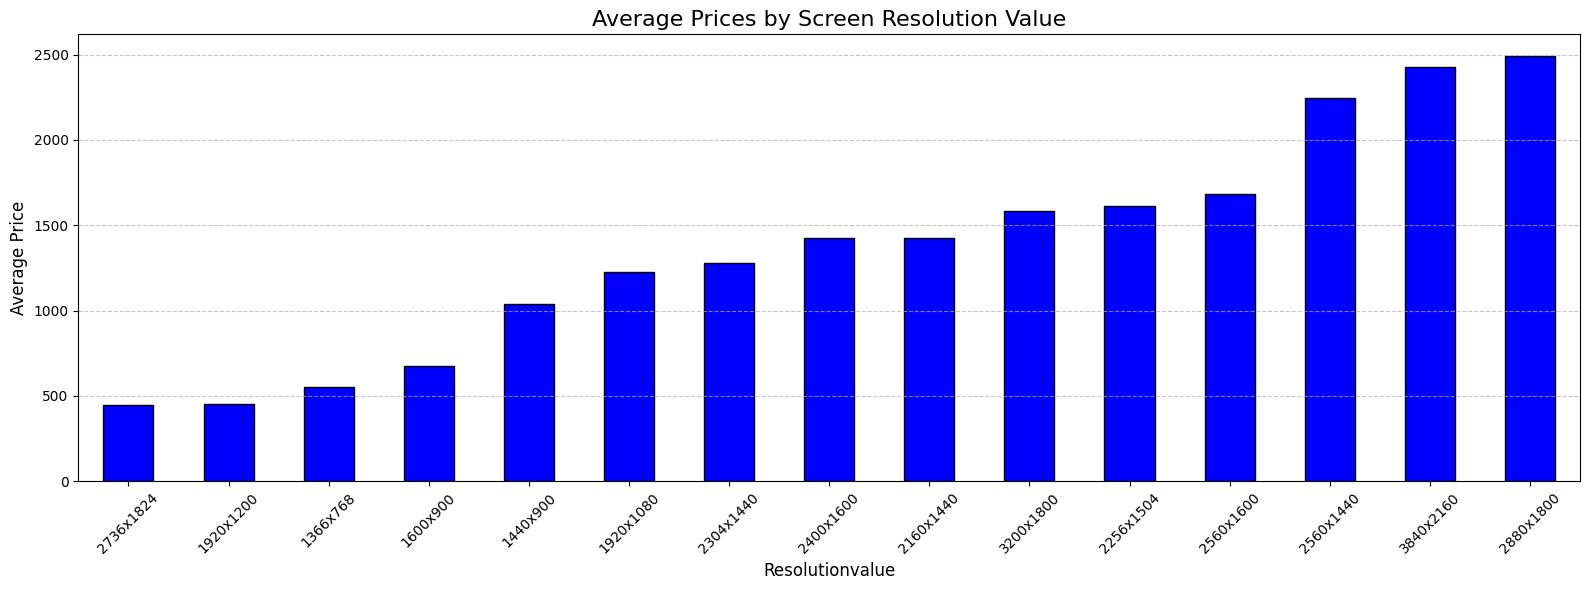

In [95]:
average_prices = df.groupby('ResolutionValue')['Price_euros'].mean().sort_values()

plt.figure(figsize=(16, 6))
average_prices.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Average Prices by Screen Resolution Value', fontsize=16)
plt.xlabel('Resolutionvalue', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

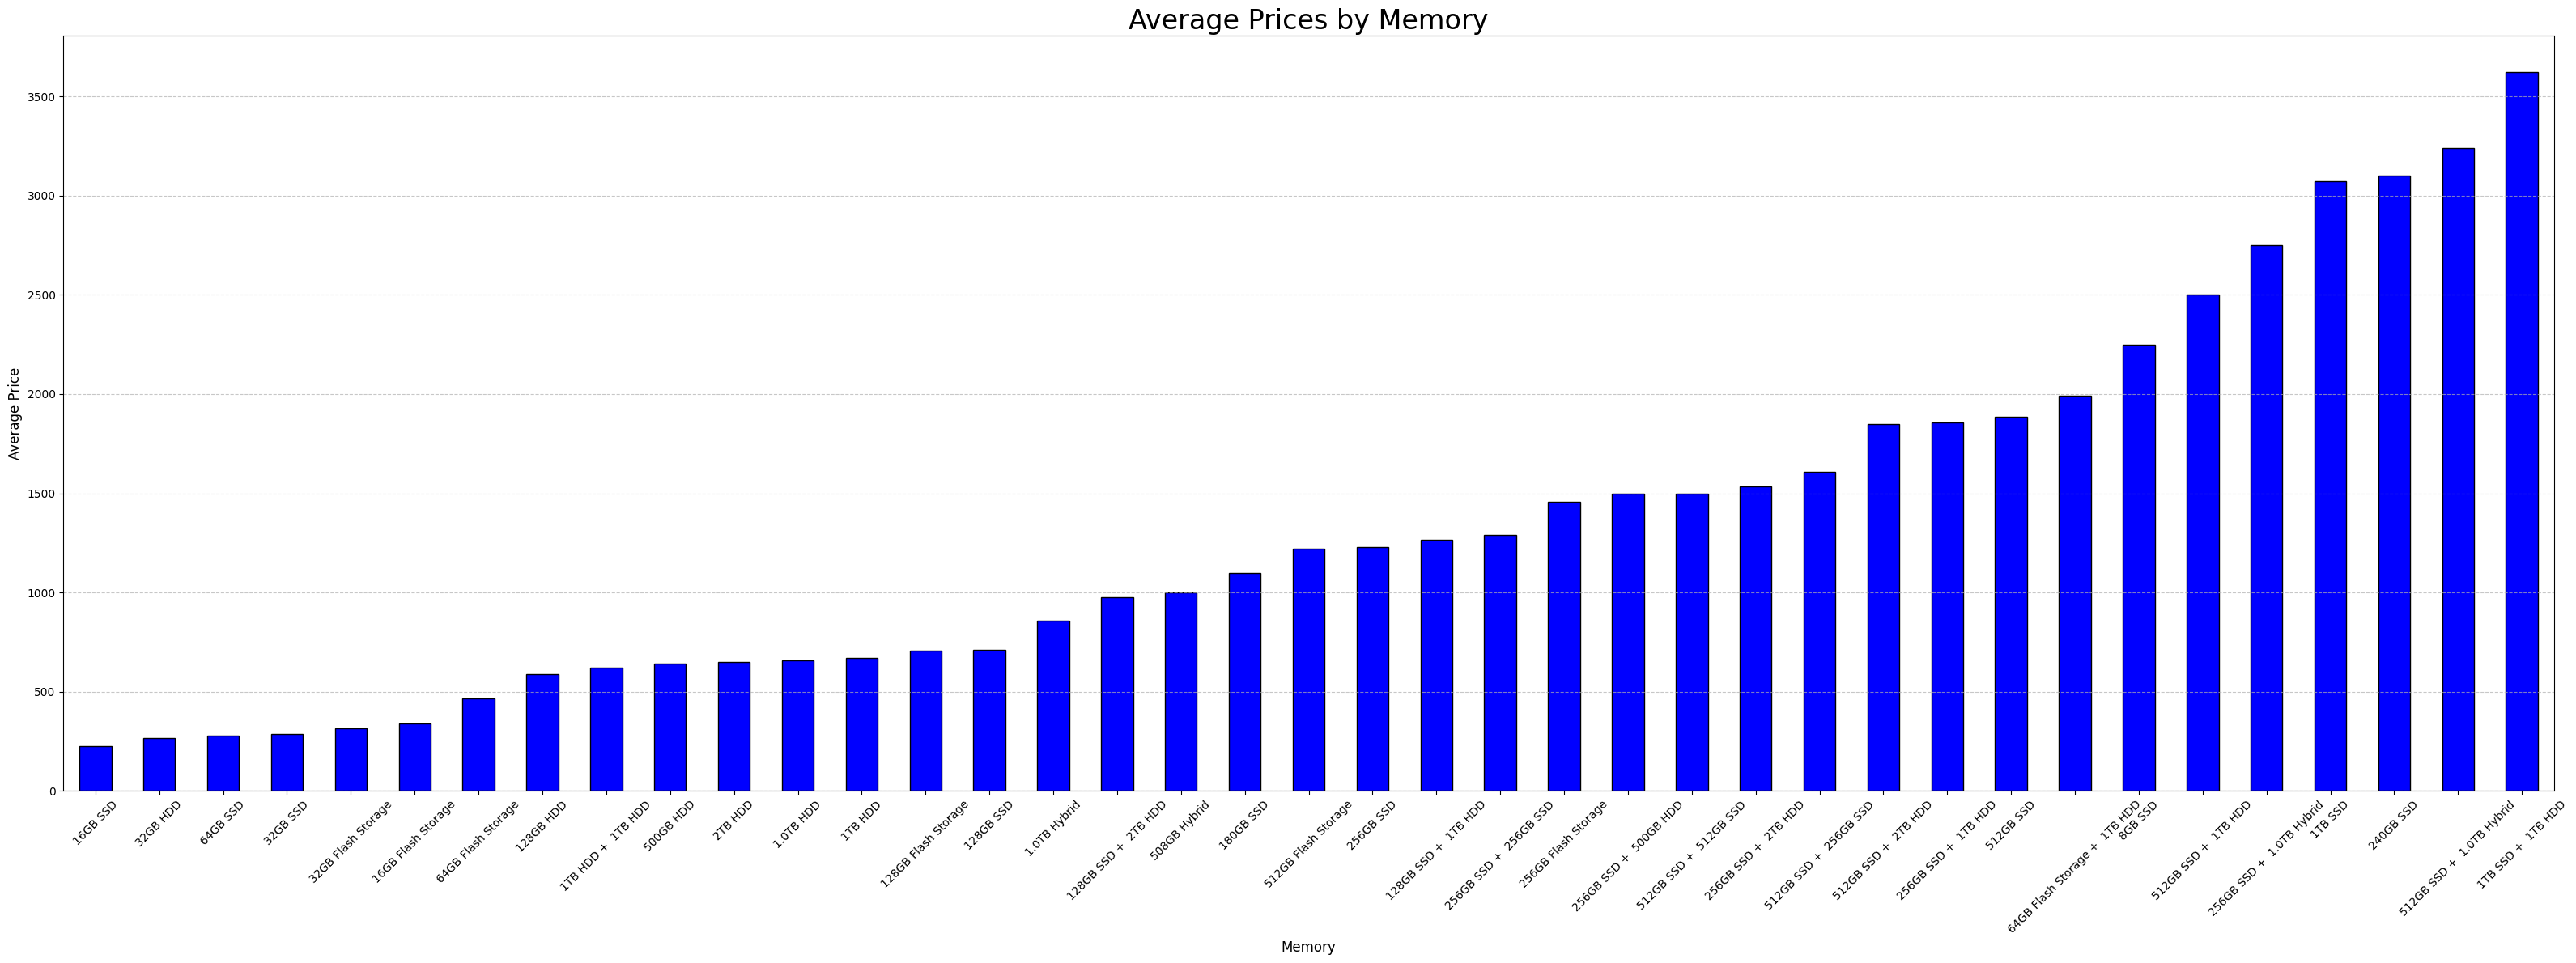

In [96]:
average_prices = df.groupby('Memory')['Price_euros'].mean().sort_values()

plt.figure(figsize=(32, 12))
average_prices.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Average Prices by Memory', fontsize=24)
plt.xlabel('Memory', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

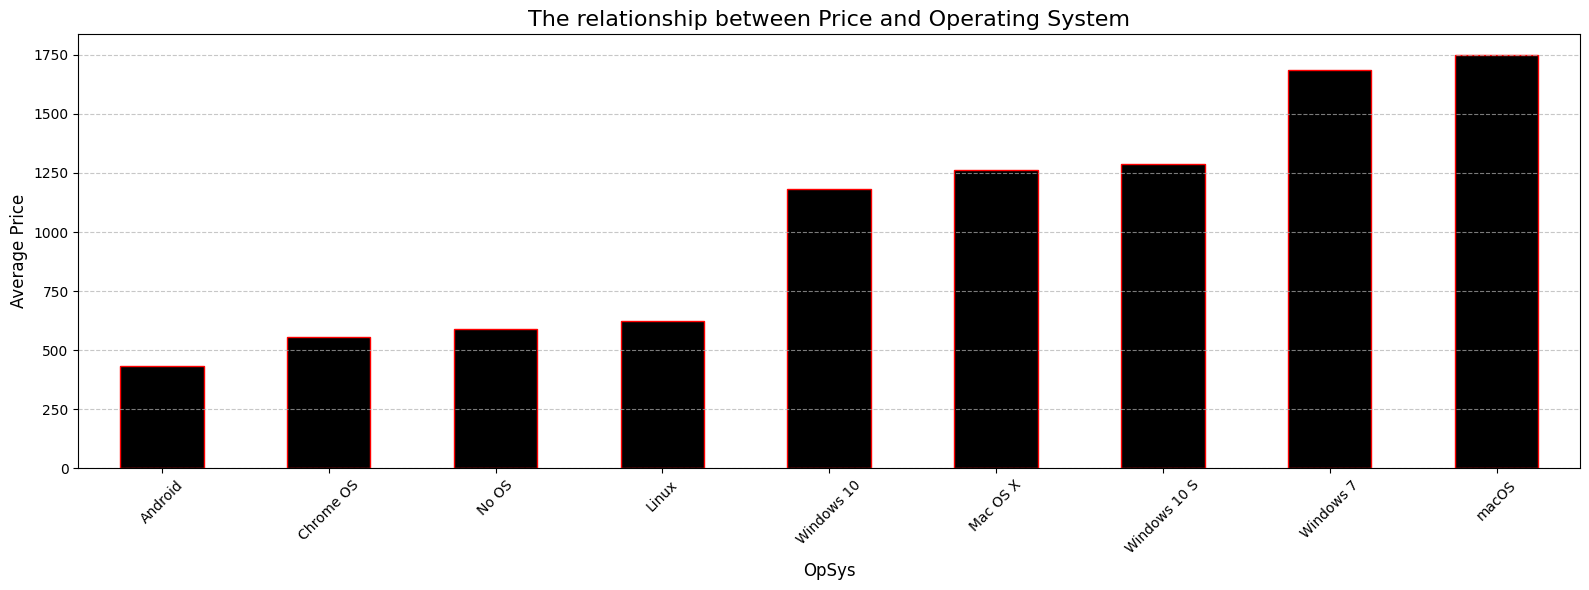

In [97]:
average_prices = df.groupby('OpSys')['Price_euros'].mean().sort_values()

plt.figure(figsize=(16, 6))
average_prices.plot(kind='bar', color='black', edgecolor='red')

plt.title('The relationship between Price and Operating System', fontsize=16)
plt.xlabel('OpSys', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Axes: ylabel='Price_euros'>

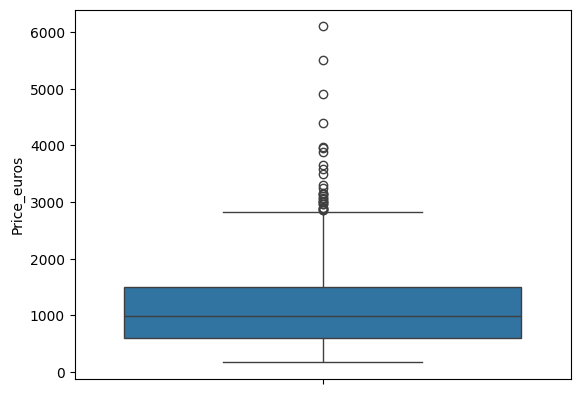

In [98]:
sns.boxplot(y=df['Price_euros'])

#### There seems to be outliers based on the boxplot above so we will use the IQR method to eliminate them

In [99]:
Q1 = df['Price_euros'].quantile(0.25)
Q3 = df['Price_euros'].quantile(0.75)

lower_outliers = Q1 - 1.5*(Q3-Q1)
upper_outliers = Q3 + 1.5*(Q3-Q1)

# Remove the outlier
df = df[(df['Price_euros'] >= lower_outliers) & (df['Price_euros'] <= upper_outliers)]

<Axes: ylabel='Price_euros'>

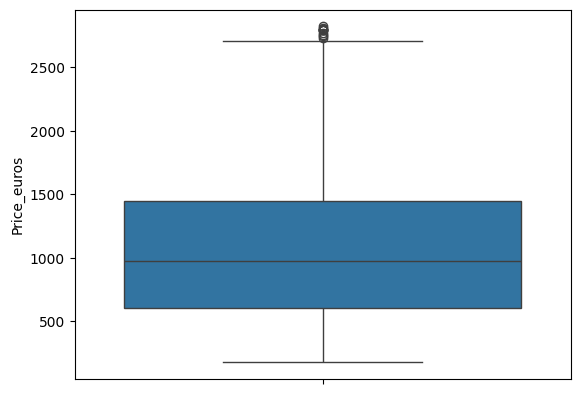

In [100]:
sns.boxplot(y=df['Price_euros'])

In [101]:
df.shape

(1247, 18)